### TP6_Data Science done by : Joel Kabangu Kabobo & Taha Dahmani 

# Cryptocurrency Trends : Bitcoin Prediction

#### This work is about the analysis of the trends of Cryptocurrency Bitcoin.

We are going to visual the trends of Bitcoin, to explore it, to analyse it and to predict the trends will uptrends or Downtrends based on our machine learning methods. For that we used the de LSTM deep learning model.

Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#### We load our Bitcoin vs Euro dataset that we downloaded in the Yahoo Finance website. Our dataset contains the trends of bitcoins vs Euro upto April 2022.

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving BTC-EUR.csv to BTC-EUR (2).csv


In [ ]:
import io
 
bitcoin_pd = pd.read_csv(io.BytesIO(uploaded['BTC-EUR.csv']))
bitcoin_pd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


#### We plotted the value or attribut "Close" to see his the bitcoin trend evolution. 

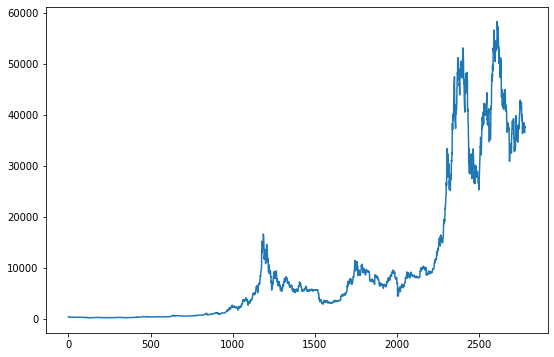

In [ ]:
bitcoin_pd['Close'].plot(figsize=(9, 6))
plt.show()

#### We want to have the dates as absices in our graphic, so for that we need to specify the Date column as the index columns cause the default index are autogenerated. And we specified also that the Date column should be interprete as dates by writing parse-dates= True

In [ ]:
bitcoin_pd.index
bitcoin_pd = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin_pd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


#### We got now the index of type date-time index and we can do easily now our time series analysis.

#### We plot the trend of bitcoin all the years upto April 2022.

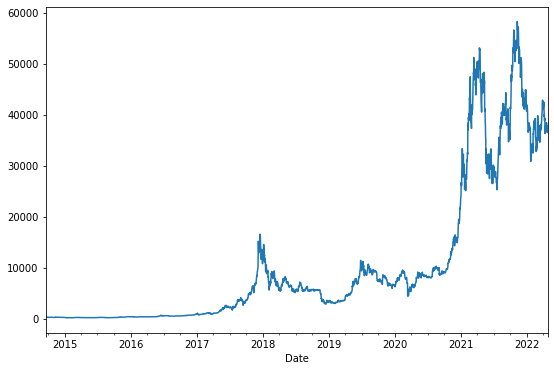

In [ ]:
bitcoin_pd['Close'].plot(figsize=(9, 6))
plt.show()

#### The trend of bitcoin in 2022 upto April.

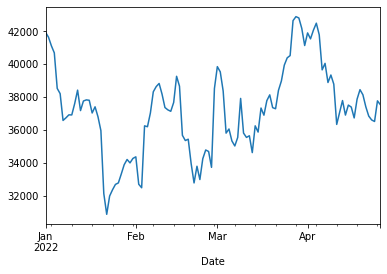

In [ ]:
bitcoin_pd.loc['2022','Close'].plot()

#### The trend of bitcoin just in April 2022.

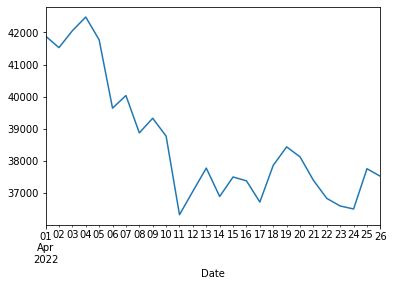

In [ ]:
bitcoin_pd.loc['2022-04','Close'].plot()

#### The trend of bitcoin From January 2020 to April 2022.

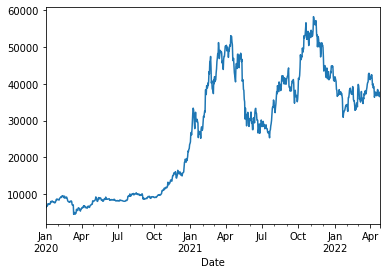

In [ ]:
bitcoin_pd['2020':'2022']['Close'].plot()

#### To have a good look of our data, we resample the trends of 2022 by months.

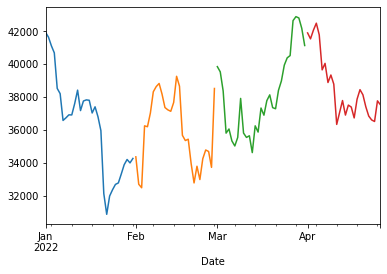

In [ ]:
bitcoin_pd.loc['2022','Close'].resample('M').plot()
plt.show()

#### we plot the mean of the trends of bitcoin every Weeks of 2022 upto April.

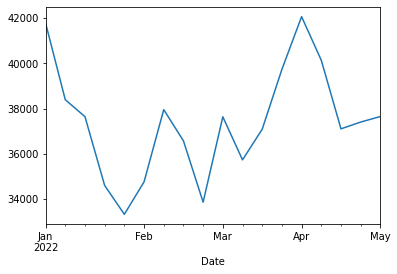

In [ ]:
bitcoin_pd.loc['2022', 'Close'].resample('W').mean().plot()
plt.show()

#### we plot the standard deviation of the trends of bitcoin every Weeks of 2022 upto April.

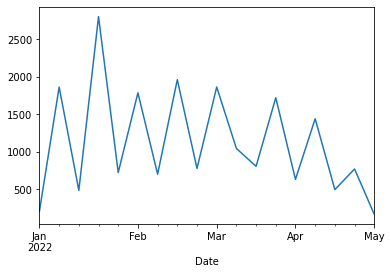

In [ ]:
bitcoin_pd.loc['2022', 'Close'].resample('W').std().plot()
plt.show()

We made the mean of the trends for every weeks in 2022, the standard deviation of it and we found the maximum value and the minimax value, And we put togetter the results in one table using the agg() function of pandas.

In [ ]:
bitcoin_pd.loc['2022','Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2022-01-02,41778.070312,209.684782,41629.800781,41926.339844
2022-01-09,38390.347098,1865.011008,36575.898438,41105.722656
2022-01-16,37640.520090,486.881876,36912.199219,38415.820313
2022-01-23,34598.820870,2804.811762,30877.941406,37403.785156
2022-01-30,33323.720145,725.244809,32369.328125,34206.476563
2022-02-06,34757.405413,1788.373631,32490.472656,37026.605469
2022-02-13,37950.845982,702.567116,37131.113281,38821.855469
2022-02-20,36572.052455,1963.888085,33958.773438,39255.910156
2022-02-27,33860.719866,778.727134,32783.445313,34782.894531


#### We creat a graphic with the results of aggregate and we plott the mean by weeks of the trends in 2022 and we use the fill_between() function of matplotlib in order to create an uncertaunty zone between the maximum and the minum value for each weeks of 2022.

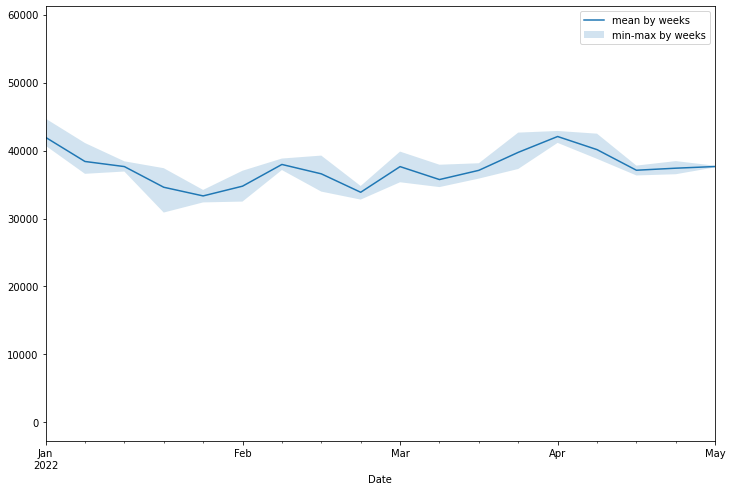

In [ ]:
m = bitcoin_pd['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2022'].plot(label='mean by weeks')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max by weeks')

plt.legend()
plt.show()

#### We plot the results of the aggregate resulting table

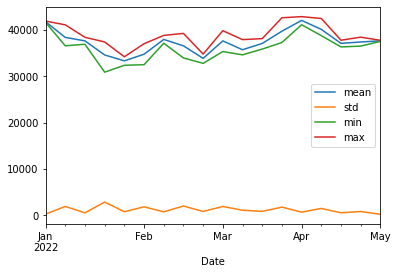

In [ ]:
bitcoin_pd.loc['2022', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

#### We check null value in our dataset.

In [ ]:
print('Null Values:',bitcoin_pd.isnull().values.sum())
print('NA values:',bitcoin_pd.isnull().values.any())

Null Values: 0
NA values: False


# Building LSTM Model



#### First Step is Preparing Data for Training and Testing
#### Here we are just considering 1 year data for training data
#### Since Bitcoin price has drastically flucated since 2014 to 2022 we will just consider 1 Year to avoid this type of flucation in the data.
#### As we want to predict Close Price of the Bitcoin so we are just Considering Close and Date

In [ ]:
# Final shape of the dataset after dealing with null values 

bitcoin_pd.shape
bitcoin_pd = pd.read_csv('BTC-EUR.csv')

In [ ]:
# Lets First Take all the Close Price 
bitcoin_pd = pd.read_csv('BTC-EUR.csv')
closedf = bitcoin_pd[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2779, 2)


#### We take just the data for one year

In [ ]:
closedf = closedf[closedf['Date'] > '2021-04-23']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  368


In [ ]:
closedf

,Date,Close
2411,2021-04-24,41374.101563
2412,2021-04-25,40534.261719
2413,2021-04-26,44721.855469
2414,2021-04-27,45522.515625
2415,2021-04-28,45178.683594
...,...,...
2774,2022-04-22,36841.980469
2775,2022-04-23,36606.882813
2776,2022-04-24,36513.359375
2777,2022-04-25,37765.523438


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Normalizing Data
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(368, 1)


#### Slicing data into Training set and Testing set

In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (220, 1)
test_data:  (148, 1)


#### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15 of time step.

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (204, 15)
y_train:  (204,)
X_test:  (132, 15)
y_test (132,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (204, 15, 1)
X_test:  (132, 15, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
# fitting the train data into the model

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
7/7 [==============================] - 2s 49ms/step - loss: 0.5922 - val_loss: 0.3416
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.5363 - val_loss: 0.3044
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4890 - val_loss: 0.2731
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.4488 - val_loss: 0.2462
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4162 - val_loss: 0.2222
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3857 - val_loss: 0.2000
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3600 - val_loss: 0.1759
Epoch 8/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3344 - val_loss: 0.1510
Epoch 9/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3060 - val_loss: 0.1277
Epoch 10/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2737 - val_loss: 0.1057
Epoch 11/20
7/7 [============

### Plotting Loss vs Validation loss

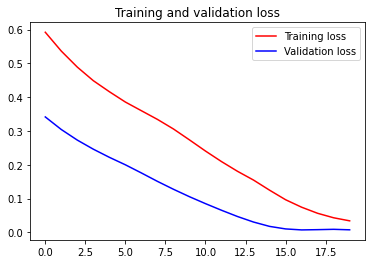

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### We do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((204, 1), (132, 1))

## Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

#### Evaluation metrices RMSE, MSE and MAE

The Mean Average Error (MAE), the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE). 
In short, MAE evaluates the absolute distance of the observations (the entries of the dataset) to the predictions on a regression, taking the average over all observations.The MSE has the units squared of whatever is plotted on the vertical axis. RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print(" Evaluation sur le Test Datat")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  5619.903524438843
Train data MSE:  31583315.624000132
Train data MAE:  4774.48813765196
 Evaluation sur le Test Datat
Test data RMSE:  2899.5360844908305
Test data MSE:  8407309.505264416
Test data MAE:  2405.0854639109853


#### Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.6620141344627775
Test data explained variance regression score: 0.4609047474674869


### Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (368, 1)
Test predicted data:  (368, 1)


This figure shows that our model predict well.

### Predicting next 10 days

We predict the trend of Bitcoin for the nexts 10 days.

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10

while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Predicted next days: ", len(lst_output))

Predicted next days:  10


#### Plotting last 15 days of dataset and next predicted 10 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print("The last days are : ", last_days)
print("The days we predicted are ; ", day_pred)

The last days are :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The days we predicted are ;  [16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

As you can see, Our model predicted that the price will go down on next days.